<a href="https://colab.research.google.com/github/jesyraf/jesyraf/blob/main/Test_sieci_neuronowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.utils import class_weight

from tensorflow import keras
from tensorflow.keras import backend as K, metrics, layers, losses, optimizers

from tensorflow.keras.activations import elu, exponential, hard_sigmoid, linear, relu, sigmoid, softmax, tanh
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy, logcosh, mean_squared_error, poisson, mean_absolute_error
from tensorflow.keras.optimizers import Adadelta, Adam, Nadam, RMSprop, SGD

In [ ]:
rng = np.random.RandomState(1)
def sample_spherical(npoints, ndim=3,random_state=1,normalize=True,noise = True):
    np.random.seed(random_state)
    vec = np.random.randn(npoints,ndim)
    vec /= np.reshape(np.linalg.norm(vec, axis=1),[npoints,1])
    if noise :
      vec = vec + 0.1*rng.randn(npoints,ndim)
    if normalize :
      vec[:,0] = (vec[:,0]-min(vec[:,0]))/(max(vec[:,0]-min(vec[:,0])))
      vec[:,1] = (vec[:,1]-min(vec[:,1]))/(max(vec[:,1]-min(vec[:,1])))
    return vec

In [ ]:
rng = np.random.RandomState(1)
sfera = sample_spherical(1000,2)
sfera_y = sfera[:,0] - sfera[:,1]
sfera_y = (sfera_y - min(sfera_y))/(max(sfera_y) - min(sfera_y))

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=sfera[:, 0],
               y=sfera[:, 1],
               mode='markers',
               marker=dict(color=sfera_y)))
fig.show()

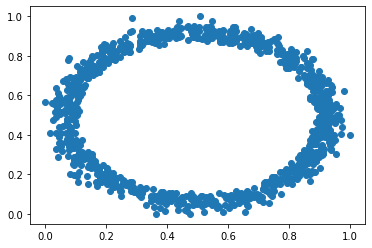

In [ ]:
plt.scatter(sfera[:,0],sfera[:,1])